In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [81]:
data = pd.read_csv('/content/drive/MyDrive/Jedha_Fullstack/Speed_Dating_Project/Speed+Dating+Data.csv', encoding="ISO-8859-1")

#Introduction

Ce dataset est issu d'une étude réalisée par Tinder dans le but de mieux comprendre les facteurs d'attraction entre les individus. L'étude comprenait une série d'événements appelés "waves", où les participants étaient invités à participer à des rendez-vous ponctués de questionnaires portant sur les traits attractifs potentiels chez le sexe opposé, chez eux-mêmes ou chez des personnes du même sexe, selon leur perception.

Le premier objectif de cette analyse est de mettre en lumière, à partir des conclusions de cette étude, les attributs supposés les plus attractifs chez le sexe opposé. Dans un deuxième temps, il sera intéressant d'examiner si les participants ont par ailleurs une perception précise des attributs recherchés par le sexe opposé.

In [82]:
#Premier aperçu du dataset

data

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [83]:
#Nombre de participants uniques

len(data['iid'].unique())

551

In [84]:
#Chaque participant unique ne fait pas un nombre égale de rendez-vous (1 ligne = 1 rdv dans ce dataset)

data['iid'].value_counts()

552    22
530    22
528    22
527    22
526    22
       ..
136     5
135     5
134     5
133     5
132     5
Name: iid, Length: 551, dtype: int64

In [85]:
#Vérification que chaque individu ne donne qu'une seule réponse au temps 1 pour les variables qui nous intéressent

variables = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]

for var in variables:
    print(data.groupby('iid')[[var]].nunique().max())

attr1_1    1
dtype: int64
sinc1_1    1
dtype: int64
intel1_1    1
dtype: int64
fun1_1    1
dtype: int64
amb1_1    1
dtype: int64
shar1_1    1
dtype: int64
attr2_1    1
dtype: int64
sinc2_1    1
dtype: int64
intel2_1    1
dtype: int64
fun2_1    1
dtype: int64
amb2_1    1
dtype: int64
shar2_1    1
dtype: int64


La documentation annexe et le premier aperçu des données nous permettent d'observer dans un premier temps que le dataset présente énormément de variables. D'abord, il est important de noter que l'étude s'est déroulée en plusieurs temps. Par conséquent, il a été demandé aux participants de classer les mêmes attributs donnés potentiellement attirants à des moments différents. Temps1 : avant le premier date ; Temps2 : au lendemain de l'évènement ; Temps3 : 3 à 4 semaines après l'évènement. Ceci explique, au delà du grand nombre d'informations demandées aux participants, le nombre élevées de variables, et donc de colonnes dans le dataset.

Par ailleurs, il est important de noter que l'échelle de classement des attributs donnés potentiellement attirants ne fut pas la même selon les évènements. Plus précisément, la documentation annexe nous informe que les évènements 6 à 9 inclus n'utilisaient pas la même méthode et devront donc être analysés séparément des autres. C'est la raison pour laquelle le choix a été fait de scinder le dataset en deux parties, d'après ces méthodes de classement des attributs différentes.

In [86]:
#Séparation du dataset originel en deux parties suivant les différentes modalités de classement des attributs

data1_1 = data.loc[(data["wave"]<=5) | (data["wave"]>=10)]
data1_2 = data.loc[(data["wave"]>5) & (data["wave"]<10)]

#Vérification qu'il n'y a pas d'erreur dans la séparation qui aurait fait perdre des observations

print(len(data))
print(len(data1_1+data1_2))

8378
8378


In [87]:
'''
Dans le cadre de notre problématique nous nous intéressons qu'aux déclarations des individus concernants les facteurs d'attraction et non aux
tenants et aboutissants des rendez-vous. C'est pourquoi nous regroupons les données par individu, en agregeant les réponses de chaque individu
aux variables qui vont nous intéresser par la moyenne, ce qui ne pose pas de problème car nous nous intéressons uniquement au temps 1 et par
conséquent chaque individu n'aura donné qu'une seule réponse par variable.
Les variables "...1_1" représentent les réponses de chaque individu à ce qui l'attire chez le sexe opposé.
Les variables "...2_1" représentent les réponses de chaque individu à ce qu'il pense être attirant pour le sexe opposé.
'''

data1_1 = data1_1.groupby("iid")[["gender", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]].mean()
data1_2 = data1_2.groupby("iid")[["gender", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]].mean()

In [88]:
print(data1_1.shape)
print(data1_2.shape)

(449, 13)
(102, 13)


# Analyse de l'importance relative des attributs attractifs chez le sexe opposé, selon le genre

##Observations statistiques

Dans le but de répondre à notre problématique, on se focalise sur le classement des attributs déclarés les plus attirants chez le sexe opposé entre respectivement : attrait, sincérité, intelligence, fun, ambition et partage d'intérêts ou de passions. Il était demandé aux participants de hiérarchiser ces attributs en répartissant un total de 100 points entre chaque.

In [89]:
#Pour plus de lisibilité on remplace les valeurs de la colonne "gender" suivant leur signification donnée par la documentation

data1_1["gender"] = data1_1["gender"].replace([0,1], ["female", "male"])

#Stats du poids des attributs désirables chez le sexe opposé au temps 1, indifférement du sexe

data1_1.loc[:,"attr1_1":"shar1_1"].describe()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,443.000000,443.000000,443.000000,442.000000,441.000000,440.000000
mean,24.166704,17.135598,20.466117,17.354344,9.908753,11.250500
std,13.857936,7.870302,7.533931,6.766943,6.284687,6.803424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,10.000000,17.000000,12.250000,5.000000,5.000000
50%,20.000000,19.000000,20.000000,18.090000,10.000000,10.000000
75%,30.000000,20.000000,25.000000,20.000000,15.000000,15.000000
max,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000


Ce premier dataframe nous permet de porter un premier regard sur les variables à analyser, le nombre d'observations, la présence de quelques valeurs manquantes pour les attributs "fun", "ambition" et "intérêts partagés", ainsi qu'un premier aperçu de la distribution des valeurs pour chaque attribut.

In [90]:
#Statistiques descriptives des attributs désirables chez les hommes selon les femmes au temps 1

data1_1.loc[data1_1["gender"]=="female","attr1_1":"shar1_1"].describe()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,219.000000,219.000000,219.000000,219.000000,219.000000,218.000000
mean,18.766027,18.209361,21.547671,17.245890,12.013014,12.251193
std,10.783663,7.663569,7.396495,6.183457,5.618598,6.355636
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,10.000000,15.000000,19.000000,15.000000,10.000000,10.000000
50%,15.000000,20.000000,20.000000,18.000000,10.000000,10.000000
75%,20.000000,20.000000,25.000000,20.000000,15.000000,15.000000
max,90.000000,60.000000,50.000000,40.000000,30.000000,30.000000


Les premières informations que nous donnent ce dataframe concernant les attributs les plus attirants chez les hommes d'après les femmes sont les suivantes : deux attributs apparaissent en moyenne en retrait relativement aux autres, à savoir "ambition" et les "intérêts partagés". L'attribut "intelligence" se présente au contraire comme le plus important en moyenne. On observe également que l'écart-type est plutôt proche entre les différents attributs, sauf pour l'élément "attrait" où il semble plus élevé, ce que l'on peut interpréter par une plus grande hétérogénéité des réponses pour cet attribut comparativement aux autres.

In [91]:
#Stats du poids des attributs désirables chez les femmes selon les hommes au temps 1

data1_1.loc[data1_1["gender"]=="male","attr1_1":"shar1_1"].describe()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,224.000000,224.000000,224.000000,223.000000,222.000000,222.000000
mean,29.446830,16.085804,19.408705,17.460852,7.832928,10.267838
std,14.502109,7.944778,7.533174,7.307189,6.227410,7.093945
min,6.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,10.000000,15.000000,12.000000,5.000000,5.000000
50%,25.000000,15.000000,20.000000,19.000000,8.500000,10.000000
75%,35.000000,20.000000,25.000000,20.000000,10.000000,15.000000
max,100.000000,40.000000,42.860000,50.000000,53.000000,30.000000


La même approche mais cette fois du côté des attraits déclarés les plus attirants chez les femmes par les hommes nous permet d'observer quelques premiers éléments. Tout d'abord, comme chez les femmes les attributs "ambition" et "intérêts partagés" sont en moyenne clairement en retrait par rapport aux autres. Différence notable cependant, l'attribut "attrait" apparaît en moyenne nettement plus important pour les hommes. Enfin, on observe comme ches les femmes des écarts-types proches quelque soit l'attribut, sauf pour "attrait" là encore, où il apparaît deux fois plus importants comparativement aux autres, synonyme comme pour les femmes d'une plus grande variété de réponses pour cet attribut comparativement aux autres.

In [92]:
#Concernant les attributs désirables chez le sexe opposé au temps 1, on exlut les vagues 6 à 9 incluses ("data1_2")

data1_2.loc[:,"attr1_1":"shar1_1"].describe()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,16.188614,17.971287,18.873762,17.875941,14.726238,14.365941
std,3.539942,2.739375,1.996339,2.361175,4.130033,3.894198
min,6.670000,5.130000,14.710000,12.500000,2.330000,2.270000
25%,14.550000,16.670000,17.310000,16.670000,13.040000,12.500000
50%,16.000000,17.950000,18.750000,17.780000,15.560000,15.090000
75%,18.180000,19.570000,20.000000,19.230000,17.780000,16.670000
max,27.780000,23.810000,23.810000,27.780000,20.590000,23.810000


Les premières statistiques descriptives révèlent un point important à ce stade. Les dataframes de statistiques descriptives mentionnés précédemment ne comprenaient que les données des événements 1 à 5 et 10 à 21. Les événements 6 à 9 utilisaient une méthode de hiérarchisation différente des attributs, ce qui nécessite de les traiter différemment. Cependant, il est apparu, à partir du dataframe ci-dessus, que les réponses fournies et la documentation associée ne concordaient pas. En effet, selon la documentation, lors de ces événements les participants étaient invités à noter les attributs de 1 à 10 en fonction de leur importance perçue, or on constate ici que la moyenne des réponses pour chaque attribut est supérieure à 10. À la lumière de cette observation, la solution la plus prudente et la plus simple afin d'éviter toute incohérence, sera simplement de se concentrer sur les individus représentant les événements 1 à 5 et 10 à 21 pour lesquels les données sont cohérentes avec la documentation fournie.


##Visualisations graphiques

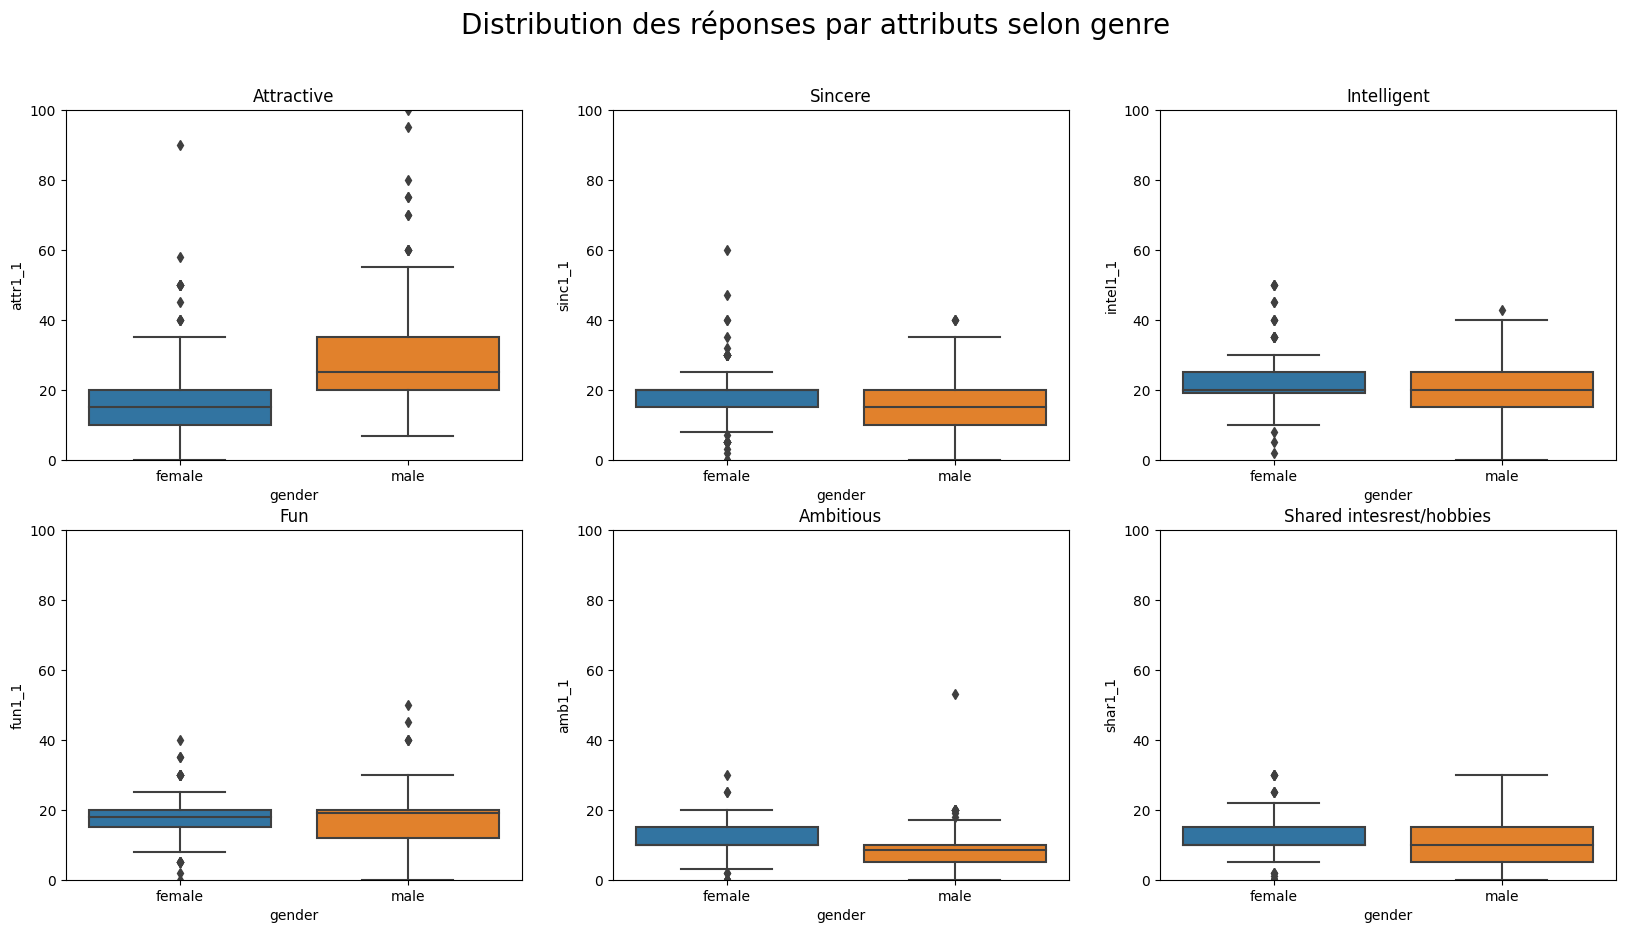

In [93]:
#Boxplots pour visualiser de manière synthétique la distribution des valeurs pour chaque attribut

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

sns.boxplot(x="gender", y="attr1_1", data=data1_1, ax=axs[0, 0])
axs[0, 0].set_title("Attractive")
axs[0, 0].set_ylim(ymin=0, ymax=100)

sns.boxplot(x="gender", y="sinc1_1", data=data1_1, ax=axs[0, 1])
axs[0, 1].set_title("Sincere")
axs[0, 1].set_ylim(ymin=0, ymax=100)

sns.boxplot(x="gender", y="intel1_1", data=data1_1, ax=axs[0, 2])
axs[0, 2].set_title("Intelligent")
axs[0, 2].set_ylim(ymin=0, ymax=100)

sns.boxplot(x="gender", y="fun1_1", data=data1_1, ax=axs[1, 0])
axs[1, 0].set_title("Fun")
axs[1, 0].set_ylim(ymin=0, ymax=100)

sns.boxplot(x="gender", y="amb1_1", data=data1_1, ax=axs[1, 1])
axs[1, 1].set_title("Ambitious")
axs[1, 1].set_ylim(ymin=0, ymax=100)

sns.boxplot(x="gender", y="shar1_1", data=data1_1, ax=axs[1, 2])
axs[1, 2].set_title("Shared intesrest/hobbies")
axs[1, 2].set_ylim(ymin=0, ymax=100)

fig.suptitle("Distribution des réponses par attributs selon genre", fontsize=20)


plt.show()

La figure ci-dessus permet de visualiser rapidement la distribution des valeurs pour chaque attribut selon le genre. L'étude des différentes boîtes à moustaches permet de constater les premiers éléments observés lors de l'analyse des statistiques descripritives et d'apporter quelques informations supplémentaires. En premier lieu, on observe clairement une nette différence selon le genre concernant l'attribut "attrait". Les hommes lui accordent un poids visiblement significativement plus important, visuellement, la réponse médiane des hommes est supérieure à plus de 75% des réponses des femmes. On note aussi une grande dispersion des valeurs pour cet attribut. On remarque ensuite que femmes et hommes accordent un poids assez proche aux autres attributs. Enfin, visuellement, les femmes semblent accorder plus d'importance que les hommes à l'attribut "ambition", 75% des réponses des femmes étant supérieures à 75% des réponses des hommes.

In [94]:
#Observation de la distribution des réponses selon le sexe pour la chaque attribut individuellement

female_data = data1_1[data1_1['gender'] == 'female']
male_data = data1_1[data1_1['gender'] == 'male']

fig = go.Figure()

fig.add_trace(go.Histogram(
    x=female_data['attr1_1'],
    name='Female attr1_1',
    marker=dict(color='#FF6699'),
    opacity=0.5,
    xbins=dict(start=0, end=100, size=10)
))

fig.add_trace(go.Histogram(
    x=male_data['attr1_1'],
    name='Male attr1_1',
    marker=dict(color='#66B2FF'),
    opacity=0.5,
    xbins=dict(start=0, end=100, size=10)
))

fig.add_trace(go.Histogram(
    x=female_data['sinc1_1'],
    name='Female sinc1_1',
    marker=dict(color='#FF6699'),
    opacity=0.5,
    xbins=dict(start=0, end=100, size=10)
))

fig.add_trace(go.Histogram(
    x=male_data['sinc1_1'],
    name='Male sinc1_1',
    marker=dict(color='#66B2FF'),
    opacity=0.5,
    xbins=dict(start=0, end=100, size=10)
))

fig.add_trace(go.Histogram(
    x=female_data['intel1_1'],
    name='Female intel1_1',
    marker=dict(color='#FF6699'),
    opacity=0.5,
    xbins=dict(start=0, end=100, size=10)
))

fig.add_trace(go.Histogram(
    x=male_data['intel1_1'],
    name='Male intel1_1',
    marker=dict(color='#66B2FF'),
    opacity=0.5,
    xbins=dict(start=0, end=100, size=10)
))

fig.add_trace(go.Histogram(
    x=female_data['fun1_1'],
    name='Female fun1_1',
    marker=dict(color='#FF6699'),
    opacity=0.5,
    xbins=dict(start=0, end=100, size=10)
))

fig.add_trace(go.Histogram(
    x=male_data['fun1_1'],
    name='Male fun1_1',
    marker=dict(color='#66B2FF'),
    opacity=0.5,
    xbins=dict(start=0, end=100, size=10)
))

fig.add_trace(go.Histogram(
    x=female_data['amb1_1'],
    name='Female amb1_1',
    marker=dict(color='#FF6699'),
    opacity=0.5,
    xbins=dict(start=0, end=100, size=10)
))

fig.add_trace(go.Histogram(
    x=male_data['amb1_1'],
    name='Male amb1_1',
    marker=dict(color='#66B2FF'),
    opacity=0.5,
    xbins=dict(start=0, end=100, size=10)
))

fig.add_trace(go.Histogram(
    x=female_data['shar1_1'],
    name='Female shar1_1',
    marker=dict(color='#FF6699'),
    opacity=0.5,
    xbins=dict(start=0, end=100, size=10)
))

fig.add_trace(go.Histogram(
    x=male_data['shar1_1'],
    name='Male shar1_1',
    marker=dict(color='#66B2FF'),
    opacity=0.5,
    xbins=dict(start=0, end=100, size=10)
))

fig.update_layout(
    barmode='overlay',
    template='plotly_dark',
    xaxis_title='Poids relatif accordé sur 100',
    yaxis_title='Nombre de réponses',
    showlegend=True
)

dropdown_buttons = [
    {'label': 'attr1_1', 'method': 'update', 'args': [{'visible': [True, True, False, False, False, False, False, False, False, False, False, False]}]},
    {'label': 'sinc1_1', 'method': 'update', 'args': [{'visible': [False, False, True, True, False, False, False, False, False, False, False, False]}]},
    {'label': 'intel1_1', 'method': 'update', 'args': [{'visible': [False, False, False, False, True, True, False, False, False, False, False, False]}]},
    {'label': 'fun1_1', 'method': 'update', 'args': [{'visible': [False, False, False, False, False, False, True, True, False, False, False, False]}]},
    {'label': 'amb1_1', 'method': 'update', 'args': [{'visible': [False, False, False, False, False, False, False, False, True, True, False, False]}]},
    {'label': 'shar1_1', 'method': 'update', 'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, True, True]}]}
]

fig.update_layout(
    updatemenus=[
        {'buttons': dropdown_buttons,
         'direction': 'down',
         'showactive': False,
         'x': 0.1,
         'y': 1.2
        }
    ]
)

fig.show()

L'analyse plus en détails de la distribution pour chaque attribut individuellement nous montre bien la disctinction majeure entre femmes et hommes concernant l'attribut "attrait", les réponses des femmes étant très concentrées entre 10 et 30 points tandis que celles des hommes sont bien plus étalées autour du pic entre 20 et 30 points, allant de 10 et 60 points. Ensuite, on observe bien une différence en sens inverse, plus subtite toutefois concernant l'attribut "sincérité", où le pic de la distribution est entre 20 et 30 points pour les femmes lorsqu'il est situé entre 10 et 20 points pour les hommes. On observe ensuite des distributions globalement très comparables quelque soit le sexe concernant les attributs "intelligence" et "fun". Enfin, s'agissant des attributs "intérêts partagés" et "ambition", bien que les deux sexes les considèrent en retrait relativement aux autres, on note toutefois que ce sont surtout les hommes qui leur accordent des poids très faible, entre 0 et 10 points pour un tiers à plus de la moitié d'entre eux concernant "ambition".

In [95]:
data1_1.columns[1:7]

Index(['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'], dtype='object')

In [96]:
attributs = data1_1.columns[1:7]

medians = []
for attribut in attributs:
    medians.append(data1_1.groupby("gender")[attribut].median())

medians_df = pd.DataFrame(medians)

In [97]:
stds = []
for attribut in attributs:
    stds.append(data1_1.groupby("gender")[attribut].std())

stds_df = pd.DataFrame(stds)

In [98]:
stats_df = pd.concat([medians_df, stds_df], axis=1)

stats_df.columns = ['fe_meds', 'ma_meds', 'fe_stds', 'ma_stds']

In [99]:
#Synthèse de l'obvservation de la valeur centrale et de la dispersion pour chaque attribut et selon le genre

stats_df

,fe_meds,ma_meds,fe_stds,ma_stds
attr1_1,15.0,25.0,10.783663,14.502109
sinc1_1,20.0,15.0,7.663569,7.944778
intel1_1,20.0,20.0,7.396495,7.533174
fun1_1,18.0,19.0,6.183457,7.307189
amb1_1,10.0,8.5,5.618598,6.227410
shar1_1,10.0,10.0,6.355636,7.093945


Le tableau ci-dessus vise à présenter de manière synthétique les mesures statistiques de valeur centrale et de dispersion pour chaque attribut étudié, selon le genre. La mesure de valeur centrale est ici considérée par la médiane, car moins sensible aux valeurs extrêmes que la moyenne. On retrouve ici les valeurs très proches quelque soit le sexe pour intelligence et fun. Première disctinction majeure, les femmes accordent visiblement plus d'importance à l'attribut sincérité  que les hommes, de 5 points. La seconde se confirme au sujet de l'attribut attrait, pour lequel clairement les hommes accordent globalement plus d'importance, la médiane étant quasiment de 10 points supérieure ches les hommes. Enfin, on observe à nouveau le retrait des attributs ambition et intérêts partagés, et ce pour les deux sexes. Secondement, l'observation des écarts-types nous permet de voir que la dispersion est très proche quelque soit l'attribut et le sexe, exception faîte, là encore, de l'attribut "attrait" où la dispersion est plus importante pour les deux sexes, et en particulier chez les hommes où l'écart-type est deux fois supérieur pour l'attribut "attrait" que pour les autres attributs.

In [100]:
#Visualisation de la valeur centrale pour chaque attribut selon le sexe, ici grâce à la médiane

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x=stats_df.index, y=stats_df["fe_meds"], name="female"))
fig.add_trace(go.Bar(x=stats_df.index, y=stats_df["ma_meds"], name="male"))

fig.update_layout(
    template="plotly_dark",
    xaxis_title="Attribut",
    yaxis_title="Note médiane d'importance relative sur 100",
    title="Importance des attributs chez le sexe opposé selon le genre",
    showlegend=True
)

fig.show()

Le graphique ci-dessus permet de visualiser les observations de valeur centrale et de dispersion faîtes grâce au tableau cité plus avant. L'observation de la médiane nous permet de retrouver les valeurs proches pour "intelligence" et "fun", quelque soit le sexe, le retrait relativement aux autres des attributs "ambition" et "intérêts/passions partagés" pour les femmes comme pour les hommes chez le sexe opposé, et enfin la vraie disctinction au sujet des attributs "sincérité" et "attrait".

Comme évoqué en introduction, il serait dans un second temps intéressant d'observer si, au delà de cette hiérarchisation des attributs, chaque sexe se fait une image fidèle ou non des attributs recherchés prioritairement par le sexe opposé. A cet effet, les mêmes attributs que précédemment ont été hiérarchisés par les deux sexes mais cette fois selon ce que chacun pense que le sexe opposé recherche. Les réponses des participants sont rapportées par les variables sélectionnées dans le dataframe ci_dessous.

#Analyse de la perception de l'importance relative des attributs attractifs pour le sexe opposé, selon le genre



##Observations statistiques

In [101]:
#Observation des mesures de valeur centrale et de dispersion

data1_1_attributs2_1_stats = data1_1.pivot_table(index="gender", values=["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"], aggfunc=["median", "std"])
data1_1_attributs2_1_stats.reset_index(drop=True)
data1_1_attributs2_1_stats

median                                              std             \
       amb2_1 attr2_1 fun2_1 intel2_1 shar2_1 sinc2_1   amb2_1    attr2_1   
gender                                                                      
female   10.0    35.0   20.0     10.0    10.0    10.0  5.21461  17.088156   
male     15.0    25.0   20.0     15.0    10.0    15.0  7.62978  13.747095   

                                                
          fun2_1  intel2_1   shar2_1   sinc2_1  
gender                                          
female  7.257385  5.417704  6.348791  6.332710  
male    7.211345  7.265422  6.264478  7.712595

La première observation des statistiques descriptives ci-dessus nous donne les informations suivantes. Les femmes pensent que l'attribut "attrait" est de loin le plus important pour les hommes, très nettement devant "fun" qui arrive en second, enfin les femmes pensent visiblement que les autres attributs sont relativements peu importants en comparaison pour les hommes. Concernant les hommes, ces derniers pensent que le femmes accordent également le plus d'importance à "attrait", mais de manière moins marquée. Vient également en deuxième "fun", comme pour les femmes, enfin, concernant les hommes, l'attribut "intérêts partagés" se distingue comme étant considéré d'après eux comme le moins important pour les femmes.

In [102]:
data1_1.columns[7:]

Index(['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1'], dtype='object')

In [103]:
#Calcul des médianes pour les variables "attributs les plus recherchés" et "attributs supposés les plus importants pour le sexe opposé" selon le genre

attributs_2 = data1_1.columns[1:]

medians_2 = []
for attribut in attributs_2:
    medians_2.append(data1_1.groupby("gender")[attribut].median())
medians_2 = pd.DataFrame(medians_2)
medians_2

gender,female,male
attr1_1,15.0,25.0
sinc1_1,20.0,15.0
intel1_1,20.0,20.0
fun1_1,18.0,19.0
amb1_1,10.0,8.5
shar1_1,10.0,10.0
attr2_1,35.0,25.0
sinc2_1,10.0,15.0
intel2_1,10.0,15.0
fun2_1,20.0,20.0


In [104]:
#Dataframe global (médianes, attributs, question, sexe) pour en vue de visualiser les différences entre perception des attributs les plus importants pour le sexe opposé
#et attributs réellement considérés les plus importants pour le sexe opposé

attributs = ["attractiveness", "sincerity", "intelligence", "fun", "ambitious", "shared interests"]*2
questions = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]

medians_2_FemDec_HomPens = pd.DataFrame({
    "medians": medians_2.iloc[:6,0].tolist() + medians_2.iloc[6:,1].tolist(),
    "attribut": attributs,
    "question": questions
})

medians_2_HomDec_FemPens = pd.DataFrame({
    "medians": medians_2.iloc[:6,1].tolist() + medians_2.iloc[6:,0].tolist(),
    "attribut": attributs,
    "question": questions
})

print(medians_2_FemDec_HomPens, "\n")
print(medians_2_HomDec_FemPens)

    medians          attribut  question
0      15.0    attractiveness         1
1      20.0         sincerity         1
2      20.0      intelligence         1
3      18.0               fun         1
4      10.0         ambitious         1
5      10.0  shared interests         1
6      25.0    attractiveness         2
7      15.0         sincerity         2
8      15.0      intelligence         2
9      20.0               fun         2
10     15.0         ambitious         2
11     10.0  shared interests         2 

    medians          attribut  question
0      25.0    attractiveness         1
1      15.0         sincerity         1
2      20.0      intelligence         1
3      19.0               fun         1
4       8.5         ambitious         1
5      10.0  shared interests         1
6      35.0    attractiveness         2
7      10.0         sincerity         2
8      10.0      intelligence         2
9      20.0               fun         2
10     10.0         ambitious         

##Visualisation graphique

In [105]:
#1er graph: ce que recherchent le plus les femmes chez un homme (question 1), versus ce que les hommes pensent que les femmes recherchent le plus chez eux (question 2)

theta = medians_2_FemDec_HomPens["attribut"]
r = medians_2_FemDec_HomPens["medians"]
color = medians_2_FemDec_HomPens["question"]

fig = px.line_polar(medians_2_FemDec_HomPens, r=r, color=color, theta=theta, line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark")

fig.update_layout(
    title="Ce que recherchent les femmes (question 1) vs. ce que les hommes pensent que les femmes recherchent (question 2)",
    polar=dict(radialaxis=dict(visible=True)),
    template="plotly_dark"
)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Les enseignements de ce graphique, sur la base des réponses des participants au temps 1 sont les suivants. D'abord, les hommes semblent surestimer assez nettement, de 10 points, l'importance de l'attribut "attrait" chez eux par rapport à ce que recherchent les femmes. Ils surestiment également l'importance de l'attribut "ambition" dans ce que recherchent les femmes, mais de manière moins marquée, de 5 points. Les hommes considèrent ensuite à raison "intérêts partagés" comme relativement peu important pour une femme. Enfin ils sous-estiment de 5 points les attributs "intelligence" et "sincérité" dans l'importance que les femmes leurs accordent chez un homme.

In [106]:
#2nd graph: ce que recherchent le plus les hommes chez une femme (question 1), versus ce que les femmes pensent que les hommes recherchent le plus chez elles (question 2)

theta = medians_2_HomDec_FemPens["attribut"]
r = medians_2_HomDec_FemPens["medians"]
color = medians_2_HomDec_FemPens["question"]

fig = px.line_polar(medians_2_HomDec_FemPens, r=r, color=color, theta=theta, line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark")

fig.update_layout(
    title="Ce que recherchent les hommes (question 1) vs. ce que les femmes pensent que les hommes recherchent (question 2)",
    polar=dict(radialaxis=dict(visible=True)),
    template="plotly_dark"
)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Ce graphique nous apprend que les femmes ont une perception exacte ou très proche de l'importance des attributs "fun", "intérêts partagés" et "ambition" pour les hommes chez elles. Cependant elles sous-estiment nettement, de 10 points, l'importance qu'accordent les hommes à l'attribut "intelligence" et surestiment à l'inverse nettement, de 10 points également, l'importance de l'attribut "attrait" dans ce que recherchent le plus les hommes chez elles. Enfin, les femmes sous-estiment également, dans une moindre mesure, l'importance de l'attribut "sincérité" dans ce que les hommes recherchent chez elles.

#Synthèse

En conclusion, cette étude nous apporte plusieurs enseignements sur ce que juge le plus attirant chaque sexe chez le sexe opposé. Sur la base des attributs potentiellement attirants chez le sexe opposé définis, femmes et hommes accordent en général relativement peu d'importance aux attributs "ambition" et "intérêts partagés", a fortiori les hommes. Les deux sexes accordent ensuite une importance moyenne comparable aux attributs "fun" et "intelligence". La première distinction significative s'opère concernant l'attribut "sincérité", pour lequel les femmes accordent plus d'importance que les hommes. Il arrive en première position à égalité avec "intelligence" pour les femmes, tandis qu'il est relégué derrière "attrait", "intelligence" et "fun" pour les hommes. Enfin, la plus grande distinction se fait concernant l'attribut "attrait" où les hommes le placent en moyenne assez nettement comme étant l'attribut le plus important chez une femme, tandis que les femmes le considèrent comme d'importance bien plus relative, assez nettement derrière "sincérité" et "intelligence". A noter également que cet attribut se distingue par une grande diversité de réponses chez les hommes surtout, mais dans une moindre mesure chez les femmes également.


Secondement, l'analyse de ce que chaque sexe suppose le plus attirant pour le sexe opposé, nous révèle principalement que les femmes sous-estiment assez nettement l'attribut "intelligence" comme attirant pour un homme et sur-estiment tout aussi nettement l'attribut "attrait". Les hommes sous-estiment quand à eux visiblement les attributs "sincérité" et "intelligence" comme attirants pour une femme et surestiment de manière équivalente l'attribut "ambition". En dernier lieu, à l'instar des femmes, ils surestiment en moyenne nettement l'attribut "attrait".

Enfin, il paraît important de noter que cette étude ne porte que sur les déclarations de 449 individus, il est donc essentiel de pondérer les enseignements de cette étude, et la représentativité de ses résultats, en considérant cette information.